In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 2D Workshop Simulation

In [4]:
# Perfect sensor
def sense(x):
    return x

### Euler integration - calculate position

In [5]:
def simulate(Δt, x, u):
    x += Δt * u
    return x

### Control policy for normal ellipse

In [6]:
def control1(t, y):
    ux = -4*sin(t)# X velocity, derivative of ellipse equation
    uy = 2*cos(t)# Y velocity, derivative of ellipse equation
    return array([ux, uy])

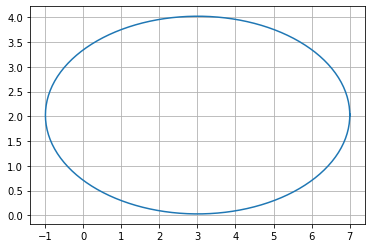

In [7]:
tf = 2 * math.pi # 2pi
Δt = 0.025    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval


# Initial conditions
x = array([7., 2.])
x_log = [copy(x)]

for t in time:
    y = sense(x)
    u = control1(t, y)
    x = simulate(Δt, x, u)
    x_log.append(copy(x))
    
x_log = array(x_log)

grid()
plot(x_log[:,0], x_log[:,1])

### Control policy for 30 degree rotated ellipse

In [8]:
def control2(t, y):
    ux = -2*sqrt(3)*sin(t) - cos(t)# X velocity, derivative of ellipse equation with 30 degree rotation applied
    uy = -2*sin(t) + sqrt(3)*cos(t)# Y velocity, derivative of ellipse equation with 30 degree rotation applied
    return array([ux, uy])

### Running the simulator

In [9]:
tf = 2 * math.pi # 2pi
Δt = 0.025    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval


# Initial conditions
x = array([6.5, 4.])
x_log = [copy(x)]

for t in time:
    y = sense(x)
    u = control2(t, y) #use control1 for standard ellipse, control2 for 30 degree rotated
    x = simulate(Δt, x, u)
    x_log.append(copy(x))
    
x_log = array(x_log)

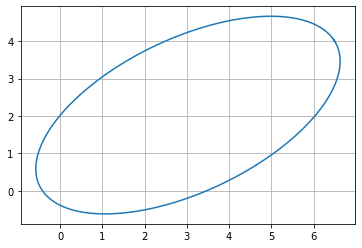

In [10]:
grid()
plot(x_log[:,0], x_log[:,1])

### Figure 8 (Lemniscate of Gerono with 45 degree rotation) control policy

In [11]:
def control3(t, y):
    ux = 2*sqrt(2) * (cos(t)**2) * ((cos(t)**2) - 3*(sin(t)**2)) # 2*sqrt(2)*sin(t)*(cos(t)**3) # X velocity - derivative of Lemniscate of Gerono equation with 45 degree rotation applied
    uy = -2*sqrt(2) * (sin(t)**2) * ((sin(t)**2) - 3*(cos(t)**2)) # 2*sqrt(2)*(sin(t)**3)*cos(t)**3 # Y velocity - derivative of Lemniscate of Gerono equation with 45 degree rotation applied
    return array([ux, uy])

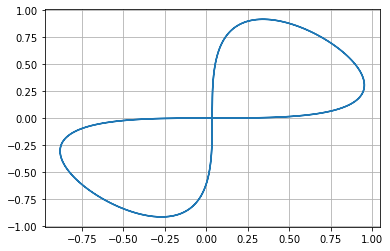

In [12]:
tf = 2 * math.pi # 2pi
Δt = 0.025    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval


# Initial conditions
x = array([0., 0.])
x_log = [copy(x)]

for t in time:
    y = sense(x)
    u = control3(t, y) #use control1 for standard ellipse, control2 for 30 degree rotated
    x = simulate(Δt, x, u)
    x_log.append(copy(x))
    
x_log = array(x_log)

grid()
plot(x_log[:,0], x_log[:,1])

## Run through the path

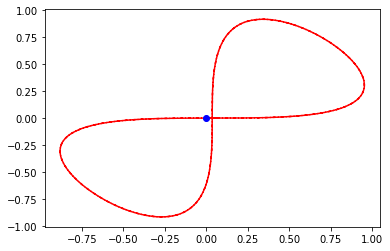

In [13]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
    


fig, ax = plt.subplots()

def animate(t):
    ax.clear()
    
    # Path
    plot(x_log[:,0], x_log[:,1], 'r--')
    
    # Initial conditions
    plot(x_log[t,0], x_log[t,1], 'bo')
    
    

anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)

HTML(anim.to_jshtml())

## Helix in 3D

In [14]:
def control4(t, y):
    ux = -sin(t) # X velocity
    uy = cos(t) # 2*sqrt(2)*(sin(t)**3)*cos(t)**3 # Y velocity
    uz = 1
    return array([ux, uy, uz])

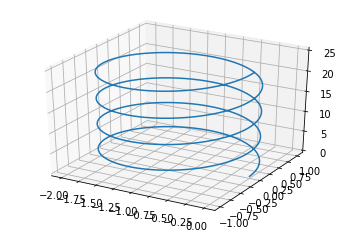

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

tf = 8 * math.pi # 8pi
Δt = 0.025    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval


# Initial conditions
x = array([0., 0., 0.])
x_log = [copy(x)]

for t in time:
    y = sense(x)
    u = control4(t, y) #use control1 for standard ellipse, control2 for 30 degree rotated
    x = simulate(Δt, x, u)
    x_log.append(copy(x))
    
x_log = array(x_log)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(x_log[:,0], x_log[:,1], x_log[:,2])